In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.cluster import KMeans

In [133]:
testArr = ['GE','CAT','RTX','UNP','HON','BA','DE','ETN','LMT','UPS','RELX','PH','WM','MMM','TT','CTAS','ITW','TRI', 'TDG','CP','EMR','NOC','GD','RSG','CNI','FDX','CSX','CARR','PCAR','NSC','CPRT','GWW','JCI','HWM','AXON']
masterArr = []
names = []
for x in testArr:
    try:
        data = yf.Ticker(x)
        historyPrice = data.history(period='1y')["Close"].rolling(200).std().iloc[-1]
        #print(historyPrice)
        masterArr.append([data.info['quickRatio'],historyPrice,data.info['debtToEquity']])
        names.append(x)
    except:
        masterArr.append([np.nan,np.nan,np.nan])
masterArr = np.array(masterArr)
print(masterArr)

[[  0.804       12.9443016  110.224     ]
 [  0.768       26.12682049 195.336     ]
 [  0.602        8.80732837  69.597     ]
 [  0.56         8.73999809 197.154     ]
 [  0.972       11.48206707 177.821     ]
 [         nan          nan          nan]
 [  1.798       35.33734933 288.043     ]
 [  0.911       24.05300789  52.594     ]
 [  1.096       49.86161549 268.347     ]
 [  1.027        6.91212648 155.425     ]
 [  0.412        1.96914363 218.662     ]
 [  0.472       65.61671307  78.976     ]
 [  0.782        7.38372339 208.894     ]
 [  0.95        16.83837477 295.441     ]
 [  0.873       31.61250476  69.203     ]
 [  0.703       17.02911977  70.573     ]
 [  0.902       12.26483268 246.05      ]
 [  0.785        4.85035747  26.548     ]
 [         nan          nan          nan]
 [  0.415        3.49757623  48.611     ]
 [  1.323       10.07733551  30.376     ]
 [  0.905       32.44803122 122.722     ]
 [  0.722       14.78336032  48.609     ]
 [  0.566       10.25258269 114.52

In [134]:
tmp = pd.DataFrame(masterArr)
masterArr = masterArr[~np.isnan(masterArr)]

In [135]:
masterArr = masterArr.reshape(-1,3)
x_norm = masterArr / masterArr.max(axis=0)
#x_norm = masterArr
print(x_norm)

[[0.1400209  0.09238713 0.37308295]
 [0.13375131 0.18647447 0.66116754]
 [0.10484152 0.06286038 0.23556988]
 [0.09752699 0.06237983 0.66732106]
 [0.169279   0.08195075 0.60188329]
 [0.31313131 0.25221261 0.97495947]
 [0.15865552 0.17167309 0.17801862]
 [0.19087426 0.35587639 0.90829303]
 [0.17885754 0.04933379 0.52607796]
 [0.071752   0.01405433 0.7401207 ]
 [0.08220132 0.46832496 0.26731564]
 [0.13618948 0.05269971 0.70705826]
 [0.16544758 0.12018022 1.        ]
 [0.15203762 0.22562735 0.23423628]
 [0.12243121 0.12154162 0.23887341]
 [0.15708812 0.08753756 0.8328228 ]
 [0.13671195 0.03461837 0.08985889]
 [0.07227447 0.02496319 0.16453708]
 [0.23040752 0.07192478 0.10281579]
 [0.15761059 0.23159074 0.41538581]
 [0.12574016 0.10551301 0.16453031]
 [0.09857193 0.07317557 0.38763746]
 [0.05590387 0.05239129 0.3663608 ]
 [0.20811564 0.00750822 0.50065157]
 [0.08934169 0.04266977 0.28976005]
 [0.82427726 0.04808521 0.2831496 ]
 [0.10780216 0.11331059 0.43541689]
 [1.         0.0240123  0.00

In [136]:
kmeans = KMeans(n_clusters=4).fit(x_norm[:,:2])
labels = kmeans.labels_

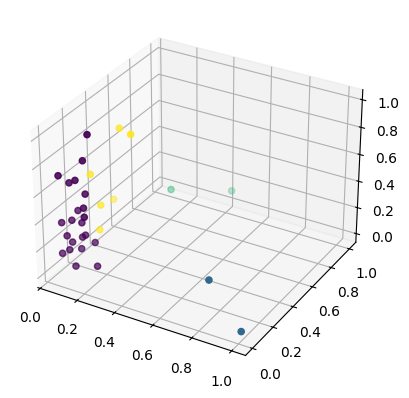

In [137]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_norm[:,0], x_norm[:,1],x_norm[:,2], c=labels)
plt.show()

In [138]:
tmp.head()

,0,1,2
0,0.804,12.944302,110.224
1,0.768,26.126820,195.336
2,0.602,8.807328,69.597
3,0.560,8.739998,197.154
4,0.972,11.482067,177.821


In [140]:
print(pd.concat([tmp,pd.DataFrame(names)], axis=1))

        0           1        2     0
0   0.804   12.944302  110.224    GE
1   0.768   26.126820  195.336   CAT
2   0.602    8.807328   69.597   RTX
3   0.560    8.739998  197.154   UNP
4   0.972   11.482067  177.821   HON
5     NaN         NaN      NaN    DE
6   1.798   35.337349  288.043   ETN
7   0.911   24.053008   52.594   LMT
8   1.096   49.861615  268.347   UPS
9   1.027    6.912126  155.425  RELX
10  0.412    1.969144  218.662    PH
11  0.472   65.616713   78.976    WM
12  0.782    7.383723  208.894   MMM
13  0.950   16.838375  295.441    TT
14  0.873   31.612505   69.203  CTAS
15  0.703   17.029120   70.573   ITW
16  0.902   12.264833  246.050   TRI
17  0.785    4.850357   26.548    CP
18    NaN         NaN      NaN   EMR
19  0.415    3.497576   48.611   NOC
20  1.323   10.077336   30.376    GD
21  0.905   32.448031  122.722   RSG
22  0.722   14.783360   48.609   CNI
23  0.566   10.252583  114.524   CSX
24  0.321    7.340511  108.238  CARR
25    NaN         NaN      NaN  PCAR
2